# Analyse Gemiddeld

Het berekenen of thuisvoordeel bestaat

Bereken over alle seizoenen heen hoe vaak de thuisploeg won / gelijk speelde / verloor

Bereken over alle seizoenen heen hoe vaak de uitploeg won / gelijk speelde / verloor


In [17]:
# Importing the necessary packages
import pandas as pd
from scipy.stats import chi2_contingency  
import matplotlib.pyplot as plt
import numpy as np# Data Frame                            # Advanced data visualisation

In [15]:
# Laad de data
wedstrijden_data = pd.read_csv(r"C:\Users\Robbe\Documents\School_jaar_2\sem2\DEP\wedstrijden.csv", sep=";")

Chi-kwadraat waarde: 2422.5703513798826
P-waarde: 0.0


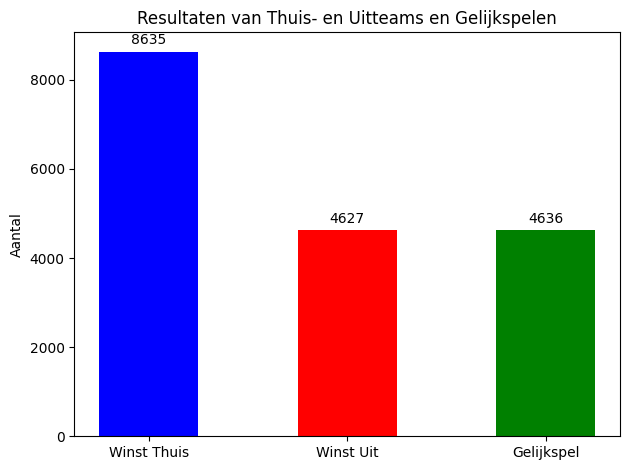

In [24]:

# Bereken hoe vaak de thuisploeg won, gelijk speelde of verloor
thuis_winst = (wedstrijden_data['FinaleStandThuisploeg'] > wedstrijden_data['FinaleStandUitploeg']).sum()
thuis_gelijk = (wedstrijden_data['FinaleStandThuisploeg'] == wedstrijden_data['FinaleStandUitploeg']).sum()
thuis_verlies = (wedstrijden_data['FinaleStandThuisploeg'] < wedstrijden_data['FinaleStandUitploeg']).sum()

# Voor de uitploeg is winst gelijk aan verlies voor de thuisploeg en vice versa
uit_winst = thuis_verlies
uit_gelijk = thuis_gelijk
uit_verlies = thuis_winst

# Creëer een contingency tabel voor de chi-kwadraat test
contingency_table = [[thuis_winst, thuis_gelijk, thuis_verlies],
                     [uit_winst, uit_gelijk, uit_verlies]]

# Voer de chi-kwadraat test uit
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-kwadraat waarde: {chi2}")
print(f"P-waarde: {p}")

# Visualisatie
# Resultaten voor winst en gelijkspel
labels = ['Winst Thuis', 'Winst Uit', 'Gelijkspel']
scores = [thuis_winst, uit_winst, thuis_gelijk]  # Gelijkspel is gelijk voor thuis en uit

x = np.arange(len(labels))  # de labellocaties
width = 0.5  # de breedte van de bars voor 'Gelijkspel' iets breder

fig, ax = plt.subplots()

# Balken voor 'Winst' en een enkele balk voor 'Gelijkspel'
rects1 = ax.bar(x[0], scores[0], width, label='Thuis', color='blue')
rects2 = ax.bar(x[1], scores[1], width, label='Uit', color='red')
rects3 = ax.bar(x[2], scores[2], width, color='green')

# Labels toevoegen, titel en aangepaste x-as tick labels, etc.
ax.set_ylabel('Aantal')
ax.set_title('Resultaten analyse')
ax.set_xticks(x)
ax.set_xticklabels(labels)

# Functie om labels toe te voegen boven bars
def autolabel(rects):
    for rect in rects:
        for bar in rect:  # Iterate over the bars within the container
            height = bar.get_height()
            ax.annotate('{}'.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 punten verticale offset
                        textcoords="offset points",
                        ha='center', va='bottom')

autolabel([rects1, rects2])
autolabel([rects3])  # Omdat rects3 nu een enkele balk voor gelijkspel vertegenwoordigt

fig.tight_layout()

plt.show()